# Set-up

In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
papers = pd.read_excel('..\..\Table_1_Paper_metrics.xlsx')
datasets = pd.read_excel('..\..\Table_3_Dataset_Metrics.xlsx')

In [11]:
# show columns
papers.columns

Index(['Article_ID', 'Title', 'Authors', 'Year', 'N_Datasets', 'Labeled',
       'Model', 'Model Info', 'Hyperparameter_Trained', 'Batch_size',
       'Metrics', 'OS_Reported', 'OS_availability', 'Data Used',
       'Code_Storage', 'Data_Storage', 'Recommend_AL'],
      dtype='object')

In [12]:
datasets.columns

Index(['Datasets_ID', 'Collection_ID', 'Valid', 'Year', 'Collection Author',
       'Prelabeled', 'Text_Type', 'Original_Use', 'Field', 'Topic',
       'N_Records', 'N_Inclusions', 'Data_Stored'],
      dtype='object')

# Visualizations

In [13]:
df = pd.read_excel('..\..\Table_1_Paper_metrics.xlsx')

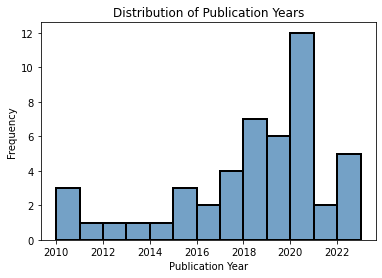

In [14]:
# Distribution of publication years
plt.figure()
min_year = int(df['Year'].min())
max_year = int(df['Year'].max())
sns.histplot(data=df, x='Year', bins=range(min_year, max_year+1), kde=False, linewidth=2, color='steelblue')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.title('Distribution of Publication Years')

# save figure
plt.savefig('Distribution of Publication Years.png', dpi=300)

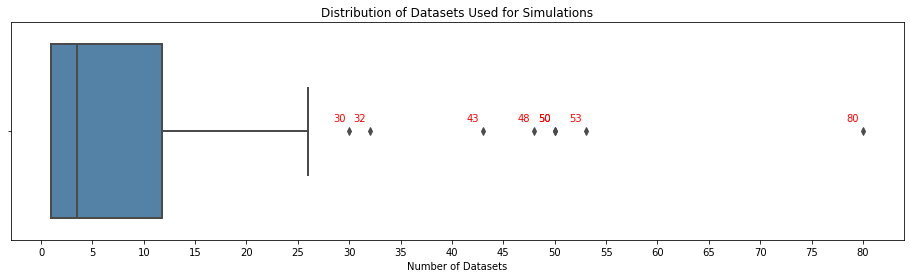

In [15]:
# Number of datasets used for simulations
plt.figure(figsize=(16, 4))
ax = sns.boxplot(data=df, x='N_Datasets', linewidth=2, color='steelblue')
plt.xlabel('Number of Datasets')
plt.title('Distribution of Datasets Used for Simulations')
plt.xticks(range(0, 85, 5))

# Calculate the outliers using the interquartile range (IQR)
Q1 = df['N_Datasets'].quantile(0.25)
Q3 = df['N_Datasets'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and annotate the outliers
outliers = df[(df['N_Datasets'] < lower_bound) | (df['N_Datasets'] > upper_bound)]
for index, row in outliers.iterrows():
    ax.annotate(int(row['N_Datasets']), (row['N_Datasets'], 0), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='red')



# save figure
plt.savefig('Distribution of Datasets Used for Simulations.png', dpi=300)

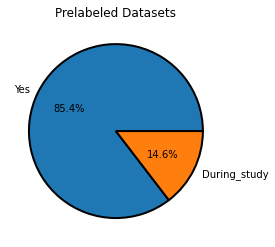

In [16]:
# Prelabeled datasets
plt.figure()
df['Labeled'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.title('Prelabeled Datasets')
plt.ylabel('')  # Hide the y-axis label

# save figure
plt.savefig('Prelabeled Datasets.png', dpi=300)

In [17]:
# Split the metrics and count occurrences
metrics_counts = {}

for metrics in df['Metrics']:
    # Split by commas, then strip leading/trailing whitespaces and convert to lowercase
    split_metrics = [metric.strip().lower() for metric in metrics.split(',')]
    
    for metric in split_metrics:
        if metric not in metrics_counts:
            metrics_counts[metric] = 1
        else:
            metrics_counts[metric] += 1

# Convert the metrics_counts dictionary to a Pandas Series for easier manipulation
metrics_counts_series = pd.Series(metrics_counts)

# combine recall and recall @ threshold and remove the old metrics
metrics_counts_series['recall'] = metrics_counts_series['recall'] + metrics_counts_series['recall @ threshold'] + metrics_counts_series['recall @ rank k'] + metrics_counts_series['recall at effort (recall@e)']
metrics_counts_series = metrics_counts_series.drop(['recall @ threshold'])
metrics_counts_series = metrics_counts_series.drop(['recall @ rank k'])
metrics_counts_series = metrics_counts_series.drop(['recall at effort (recall@e)'])

# lastrel% and last_rel
metrics_counts_series['lastrel%'] = metrics_counts_series['lastrel%'] + metrics_counts_series['last_rel'] + metrics_counts_series['last rel found']
metrics_counts_series = metrics_counts_series.drop(['last_rel'])
metrics_counts_series = metrics_counts_series.drop(['last rel found'])

# precision and precision @ last relevant found
metrics_counts_series['precision'] = metrics_counts_series['precision'] + metrics_counts_series['precision @ last relevant found']
metrics_counts_series = metrics_counts_series.drop(['precision @ last relevant found'])

# remove empty string
metrics_counts_series = metrics_counts_series.drop([''])

# wss and work saved
metrics_counts_series['wss'] = metrics_counts_series['wss'] + metrics_counts_series['work saved']
metrics_counts_series = metrics_counts_series.drop(['work saved'])

# Sort the metrics by count
sorted_metrics_counts = metrics_counts_series.sort_values(ascending=False)

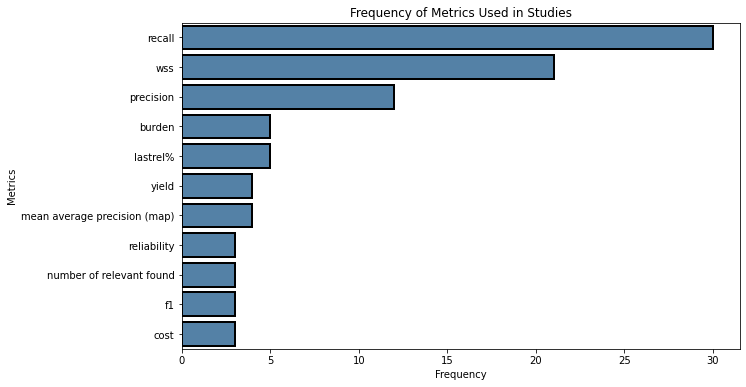

In [18]:
# barplot of metrics used in studies with at least 3 occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_metrics_counts[sorted_metrics_counts > 2].values, y=sorted_metrics_counts[sorted_metrics_counts > 2].index, orient='h', color='steelblue', edgecolor='black', linewidth=2)
plt.xlabel('Frequency')
plt.ylabel('Metrics')
plt.title('Frequency of Metrics Used in Studies')


# save figure
plt.savefig('Frequency of Metrics Used in Studies.png', dpi=300, bbox_inches='tight')

In [19]:
# print all metrics 
for i in sorted_metrics_counts.index:
    print(i)

recall
wss
precision
burden
lastrel%
yield
mean average precision (map)
reliability
number of relevant found
f1
cost
average precision
time
sensitivity
rrf
uλ
accuracy
roc/auc
recall effort
false negatives
normalized cumulative gain (“ncg”)
x95
roc
number (#) of labeled docs
l2 loss
sensitivity loss
specificity loss
eλ
aur
number of relevant studies missed
feature-entropy score
coverage
omission fraction
training fraction
review fraction
specificity
percentage screened
utilityβ
effort
total cost
utility
ap
goodness:work
baseline inclusion rate (bir)
f-measure
area under the learning curve (alc)
efficiency
true positives
performance
percentage documents screened
normalized cumulative gain
score rank
number of documents returned/shown
loss-r
loss-e
adjusted positive inclusion rate (air)
total cost with uniform penalty
total cost with weighted penalty
mean r-precision (rp)
gain curve
mean average precision (map


In [20]:
# Split the data and count occurrences
data_counts = {}

for data in df['Data Used'].dropna():
    # Split by commas, then strip leading/trailing whitespaces and convert to lowercase
    split_data = [data.strip().lower() for data in data.split(',')]
    
    for data in split_data:
        if data not in data_counts:
            data_counts[data] = 1
        else:
            data_counts[data] += 1

# Convert the data_counts dictionary to a Pandas Series for easier manipulation
data_counts_series = pd.Series(data_counts)

# Sort the metrics by count
sorted_data_counts = data_counts_series.sort_values(ascending=False)

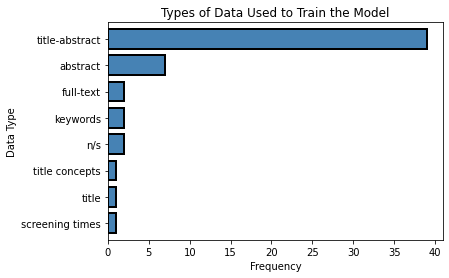

In [21]:
# Barplot of data used in studies
plt.figure()
sorted_data_counts.plot(kind='barh', x='Data Type', y='Frequency', legend=None, width=0.75, edgecolor='black', linewidth=2, color='steelblue')
plt.xlabel('Frequency')
plt.ylabel('Data Type')
plt.gca().invert_yaxis()
plt.title('Types of Data Used to Train the Model')

# save figure
plt.savefig('Types of Data Used to Train the Model.png', dpi=300, bbox_inches='tight')

In [22]:
# clean up OS_availability and OS_Reported
# change NaN to N/A in df['OS_availability'] 
df['OS_availability'] = df['OS_availability'].fillna('N/A')

# same for OS_Reported
df['OS_Reported'] = df['OS_Reported'].fillna('N/A')

# for OS_reported, combine all variants of dataset
df['OS_Reported'] = df['OS_Reported'].replace('Dataset ', 'Dataset')

# sane for OS_availability
df['OS_availability'] = df['OS_availability'].replace('Dataset ', 'Dataset')

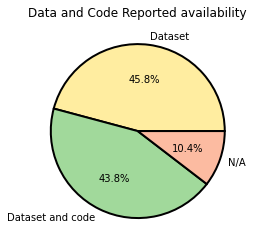

In [23]:
# Pie chart for OS_Reported
os_reported_counts = df['OS_Reported'].value_counts()
colors = {'Dataset': '#ffeda0', 'Dataset and code': '#a1d99b', 'N/A': '#fcbba1'}

plt.figure()
os_reported_counts.plot(kind='pie', autopct='%1.1f%%', colors=[colors[x] for x in os_reported_counts.index], wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.title('Data and Code Reported availability')
plt.ylabel('')  # Hide the y-axis label

# save figure
plt.savefig('OS_Reported.png', dpi=300)

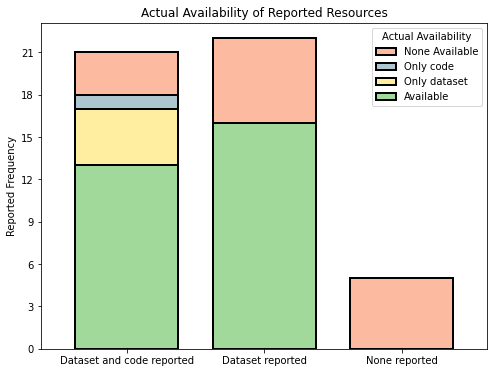

In [24]:
# barplot for OS_availability
# Create a new DataFrame to store the actual availability information
availability_data = {
    'Dataset and code': {'True': 0, 'Dataset': 0, 'Code': 0, 'None': 0},
    'Dataset': {'True': 0, 'None': 0},
    'N/A': {'None': 0}
}

for idx, row in df.iterrows():
    reported = row['OS_Reported']
    availability = row['OS_availability']
    if reported == 'Dataset and code':
        if availability == 'Dataset and code':
            availability_data[reported]['True'] += 1
        elif availability == 'Dataset':
            availability_data[reported]['Dataset'] += 1
        elif availability == 'Code':
            availability_data[reported]['Code'] += 1
        else:
            availability_data[reported]['None'] += 1
    elif reported == 'Dataset':
        if availability == 'Dataset':
            availability_data[reported]['True'] += 1
        else:
            availability_data[reported]['None'] += 1
    else:
        if availability == 'N/A':
            availability_data[reported]['None'] += 1

availability_df = pd.DataFrame(availability_data).transpose()

# Plot the stacked bar chart
colors = ['#a1d99b', '#ffeda0', '#AEC6CF', '#fcbba1']
ax = availability_df.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6),  width=0.75, edgecolor='black', linewidth=2)
plt.title('Actual Availability of Reported Resources')
plt.ylabel('Reported Frequency')
plt.xticks(rotation=0)

# Modify y-axis to show only integer values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Actual Availability', loc='upper right')

# change label N/A to Not Available
ax.set_xticklabels(['Dataset and code reported', 'Dataset reported', 'None reported'])

# Change legend None to Not Available
ax.legend_.get_texts()[0].set_text('None Available')
ax.legend_.get_texts()[1].set_text('Only code')
ax.legend_.get_texts()[2].set_text('Only dataset')
ax.legend_.get_texts()[3].set_text('Available')

# save figure
plt.savefig('Actual Availability of Reported Resources.png', dpi=300)
